# EOS LS

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [3]:
with open('eosls.txt','r') as f:
    data = f.read()
    f.close()

In [4]:
utcint = [int(i.replace('.root','')) for i in data.split('\n') if '.root' in i]

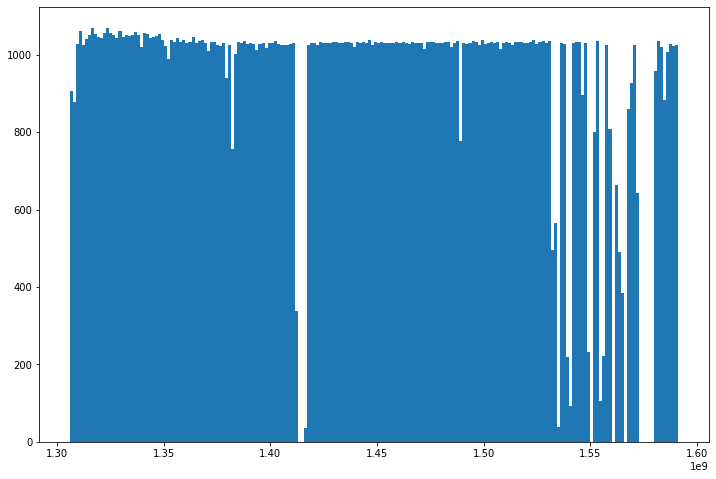

In [5]:
plt.figure(figsize=(12,8))
plt.hist(utcint,bins=200)
plt.show()

In [6]:
dates = [datetime.utcfromtimestamp(i).strftime('%Y-%m-%d %H:%M:%S') for i in utcint]

In [7]:
print(dates[0])
print(dates[-1])

2011-05-20 01:05:12
2020-06-06 12:34:22


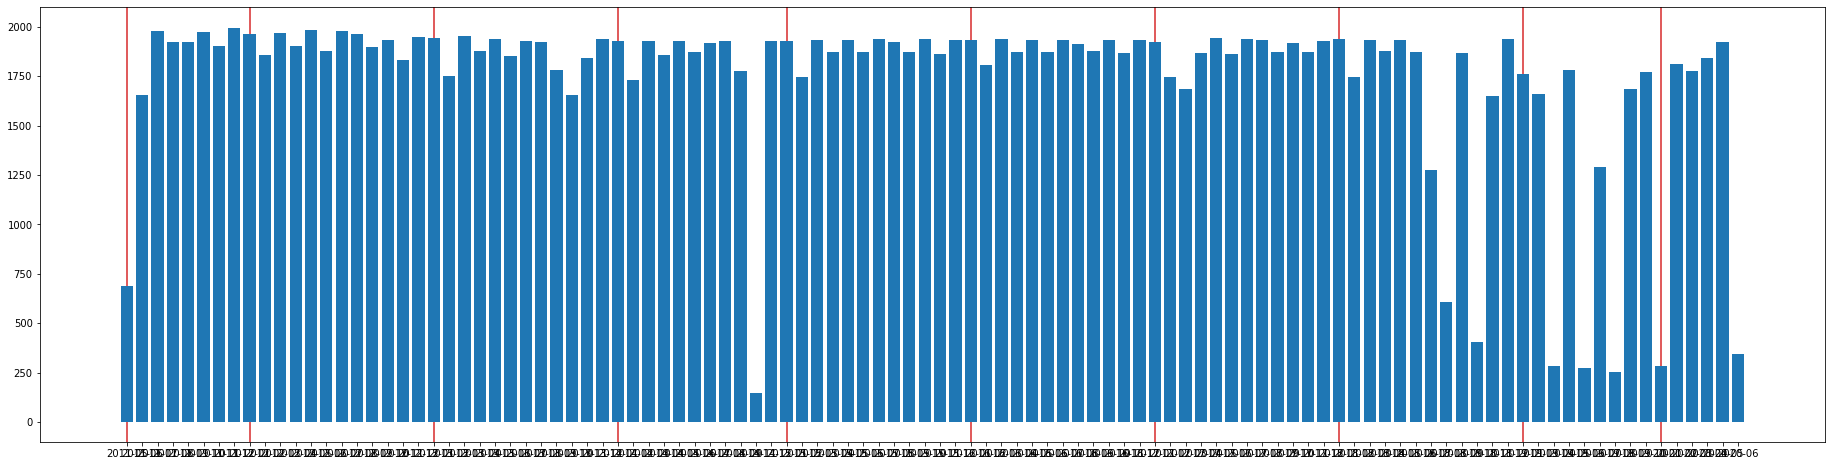

In [26]:
labels, counts = np.unique([i[:7] for i in dates], return_counts=True)

plt.figure(figsize=(32,8))
plt.bar(labels, counts, zorder=1)
for k in range(2011,2021):
    plt.axvline([i[:4] for i in labels].index(str(k)), c='tab:red', zorder=0)
plt.ylim(-100,2100)
plt.show()

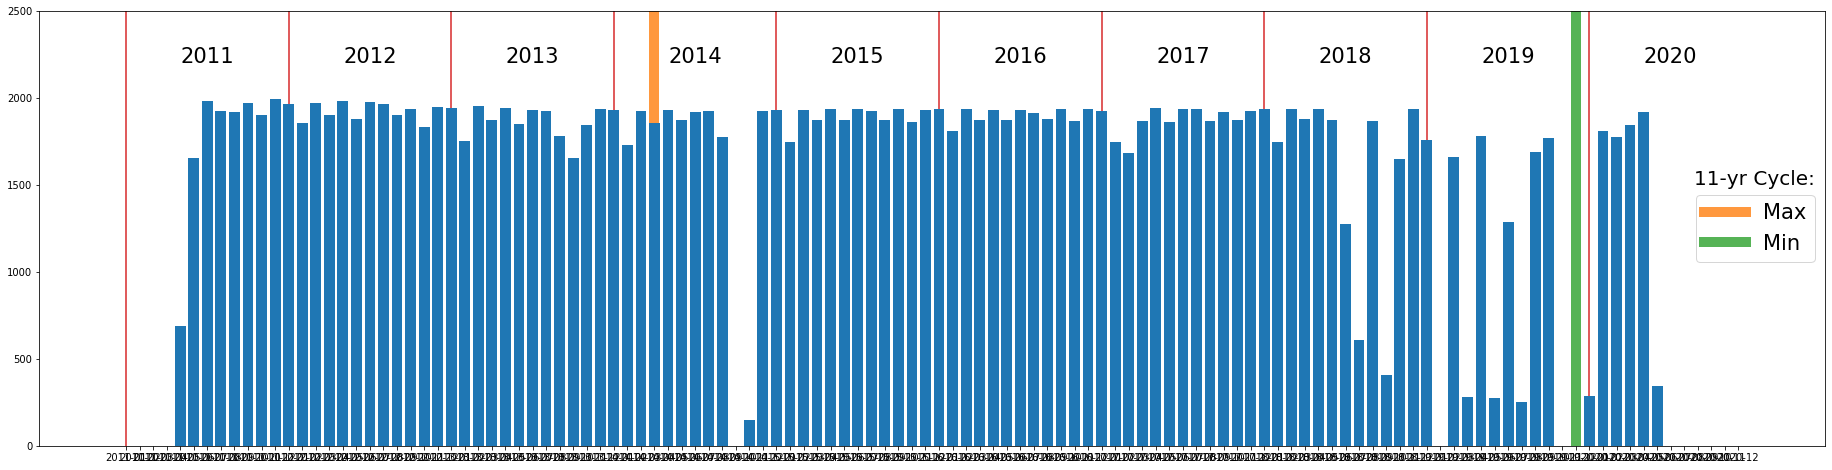

In [62]:
uni_dates, uni_counts = np.unique([i[:7] for i in dates], return_counts=True)

labels = [m for n in [[str(i) + '-' + '{:02d}'.format(j) for j in range(1,13)] for i in range(2011,2021)] for m in n]
counts = [0]*len(labels)
assert len(counts) == 12*10

for i in range(len(uni_dates)):
    year, month = [int(j) for j in uni_dates[i][:7].split('-')]
    k = (year - 2011)*12 + (month - 1)
    counts[k] += uni_counts[i]
    
plt.figure(figsize=(32,8))
plt.bar(labels, counts, zorder=9)
for k in range(2011,2021):
    plt.axvline([i[:4] for i in labels].index(str(k)), c='tab:red', zorder=1)
    plt.text(6 + 12*(k - 2011), 2200, str(k), horizontalalignment='center', fontsize=21)
plt.axvline(labels.index('2014-04'), c='tab:orange', lw=10, alpha=0.8, zorder=0, label='Max')
plt.axvline(labels.index('2019-12'), c='tab:green', lw=10, alpha=0.8, zorder=0, label='Min')
plt.ylim(0,2500)
plt.text(len(labels)+.2, 1500, '11-yr Cycle:', horizontalalignment='center', fontsize=20)
plt.legend(fontsize=21, loc='center right')
plt.show()